# ResNet Client

Client ในการทำ inference ไปที่ ResNet model บน TensorFlow Serving server ด้วย REST API.

In [1]:
import base64
import requests
import cv2
import numpy as np
import pandas as pd
from PIL import Image

### Load ImageNet Classes

In [2]:
imagenet_classes = pd.read_csv('imagenet_classes.txt', sep='\n')
imagenet_classes.index += 1
imagenet_classes.head()

,class_name
1,"tench, Tinca tinca"
2,"goldfish, Carassius auratus"
3,"great white shark, white shark, man-eater, man..."
4,"tiger shark, Galeocerdo cuvieri"
5,"hammerhead, hammerhead shark"


## TensorFlow Serving endpoint

ใส่ server URL และ endpoint ที่รัน ResNet โมเดลอยู่ 

In [3]:
SERVER_URL = 'http://localhost:8501/v1/models/resnet:predict'

### Download image from URL

ใส่ image URL ที่ต้องการ predict

In [4]:
IMAGE_URL = 'https://besthqwallpapers.com/Uploads/18-4-2018/48903/thumb2-pug-dog-muzzle-dogs-funny-dog-cute-animals.jpg'

# Download the image
dl_request = requests.get(IMAGE_URL, stream=True)
jpg_buffer = dl_request.content

### Show downloaded image

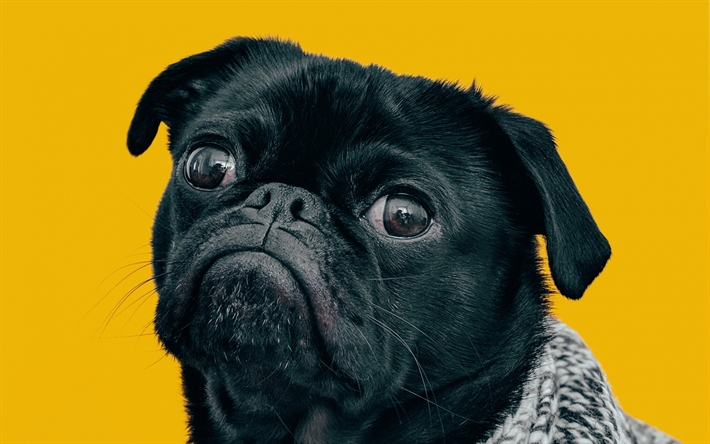

In [5]:
image = np.frombuffer(jpg_buffer, dtype='uint8')
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
# image is decoded as BRG, so cvtColor BGR2RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
Image.fromarray(image)

## Model Inference

### Compose a JSON Predict request (send JPEG image in base64).

In [6]:
jpeg_bytes = base64.b64encode(jpg_buffer).decode('utf-8')
predict_request = '{"instances" : [{"b64": "%s"}]}' % jpeg_bytes

### Perform prediction request

In [7]:
response = requests.post(SERVER_URL, data=predict_request)

total_time = response.elapsed.total_seconds()
prediction = response.json()['predictions'][0]

class_index = prediction['classes']
class_string = imagenet_classes.loc[class_index]['class_name']

print('Prediction class: [{}]\nlatency: {:.2f} ms'.format(
    class_string, 
    total_time*1000))

Prediction class: [pug, pug-dog]
latency: 83.02 ms
